In [348]:
%matplotlib inline
import os
import sys

import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr


from IPython import display

In [349]:
def rundir():
    return os.path.join('/chia_cluster/home/jackyu',
             'radiation/crd/LW/examples',
             'separate_g_groups',
             'study__lblnew_g1_threshold',
             'h2o',
             'band01_wn_20_340',
             'nv_50',
             'dv_0.02',
             'ng_10',
             'g_ascending_k_descending',
             'refPTs_P_1_T_250__P_30_T_250__P_300_T_250',
             'ng_refs_3__2__5',
             'getabsth_auto__auto__auto',
             'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
             'wgt_0.3_0.3_0.3__0.3_0.3__0.3_0.6_0.6_0.6_0.6',
             'wgt_flux_2',
             'wgt_k_1',
             'klin_none',
             'w_diffuse_1.6_1.8_1.8__1.8_1.7__1.6_1.4_1.4_1.7_1.8',
             'crd_ktable1',
             'atmpro_mls')


def getfpath_bv_atm():
    return os.path.join(rundir(), 'bv_atm.dat')


def getfpath_bg_atm():
    return os.path.join(rundir(), 'bg_atm.dat')


def getfpath_agg_bg_atm():
    return os.path.join(rundir(), 'debug_agg_bg_atm.dat')


def load_bv_atm():
    df = pd.read_csv(getfpath_bv_atm(),
                     sep=r'\s+')
    
    df = df.set_index(['k', 'v'])
    ds = xr.Dataset.from_dataframe(df)
    return ds


def load_bg_atm():
    df = pd.read_csv(getfpath_bg_atm(),
                     sep=r'\s+')

    df = df.set_index(['k', 'g'])
    ds = xr.Dataset.from_dataframe(df)
    return ds


def load_agg_bg_atm():
    df = pd.read_csv(getfpath_agg_bg_atm(), sep=r'\s+')
    df = df.set_index(['k', 'g', 'v'])
    df = df.sort_index()
    return df


def display_prolem_bg_atm():
    df = BG_ATM.to_dataframe()
    srs = pd.to_numeric(df['bg_atm'], errors='coerce')
    pd.set_option('display.max_rows', None)
    display.display(df[srs.isnull()])
    pd.reset_option('display.max_rows')


def problem_gipts():
    df = BG_ATM.to_dataframe()
    srs = pd.to_numeric(df['bg_atm'], errors='coerce')
    return srs[srs.isnull()].index.values


def plt_bv_at_ipt(ds_bv_atm, ipt):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    ds_bv_atm['bv_atm'].sel(k=ipt)\
    .to_dataframe().drop('k', axis=1).plot(ax=ax)
    return fig
    
    
def describe_bv_at_ipt(ds_bv_atm, ipt):
    display.display(ds_bv_atm['bv_atm'].sel(k=ipt)\
    .to_dataframe().drop('k', axis=1).describe())

    
def plt_bv_atm_at_random_problem_gipt():
    try:
        gipt = np.random.choice(problem_gipts())
    except ValueError:
        print('There might not be any problem ipts.')
        raise
        
    g, ipt = gipt
    
    df_bg_atm = BG_ATM.to_dataframe()
    bg_atm = df_bg_atm.loc[gipt].values[0]
    print()
    
    df = BV_ATM.sel(k=ipt).to_dataframe().drop('k', axis=1)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    df.plot(ax=ax)
    ax.set_ylabel('B(v)')
    ax.set_xlabel('v ($cm^{-1}$)')
    ax.set_title(
        'B(v, ipt={ipt}).  B(g={g}, ipt={ipt}) = {v}'\
        .format(**{'g': g, 'ipt': ipt, 'v': bg_atm}))
    display.display(fig)
    plt.close()
    
    

        
        
def gmembership_at_ipt(ipt=1):
    agg_bg_atm = AGG_BG_ATM.loc[(ipt, slice(None), slice(None))]
    agg_bg_atm.index = agg_bg_atm.index.droplevel('k')
    print(agg_bg_atm.head())
    ds = xr.Dataset.from_dataframe(agg_bg_atm)
    da = ds['bg_atm'].notnull()
    return da


def plt_gmembership(da=None):
    y = ds[da.dims[0]]
    x = ds[da.dims[1]]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

    ax.imshow(da.values,
         aspect='auto', cmap=plt.get_cmap('Greys'), alpha=.5,
         extent=(x.min(), x.max(), y.max() +.5, y.min() - .5))

    plt.yticks(y)
    ax.set_xlabel('wavenumber ($cm^{-1}$)')
    ax.set_ylabel('g')

    for v in (y[:-1]):
        ax.axhline(y=v + .5, linewidth=.1)
    
    ax.set_title('Mapping of spectral points onto g-intervals')   
    return fig
    
    
    
def script():
    
    display.display(
    display.Markdown("# g-membership plots"))
    
    for _ in range(5):
        ipt = np.random.choice(BG_ATM['k'])
        print('ipt = ', ipt)
        da = gmembership_at_ipt(ipt=ipt)
        fig = plt_gmembership(da=da)
        display.display(fig)
        plt.close()
        
        
        

In [350]:
BG_ATM = load_bg_atm()

In [351]:
BV_ATM = load_bv_atm()

In [352]:
AGG_BG_ATM = load_agg_bg_atm()

# g-membership plots

ipt =  56
            bg_atm    bv_atm
g v                         
1 92.53   0.000566  0.000566
  208.45  0.002248  0.001683
2 74.11   0.000393  0.000393
  100.51  0.001037  0.000645
  202.69  0.002673  0.001636


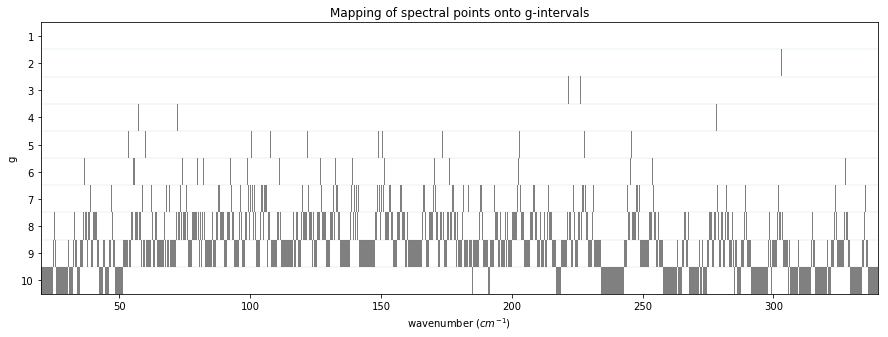

ipt =  186
            bg_atm    bv_atm
g v                         
1 92.53   0.000807  0.000807
  208.45  0.003562  0.002755
2 74.11   0.000549  0.000549
  100.51  0.001476  0.000927
  202.69  0.004135  0.002659


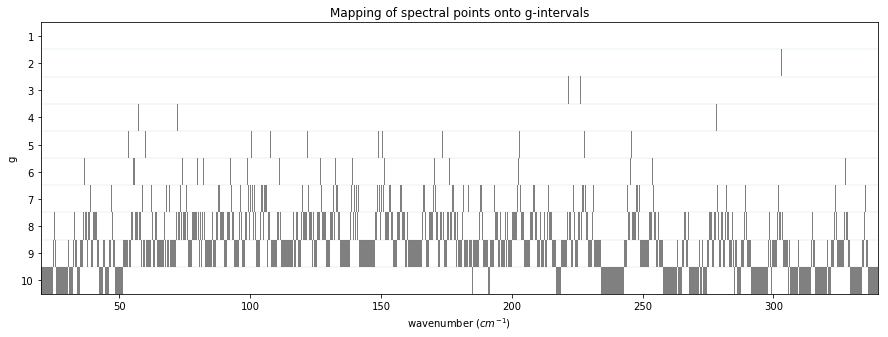

ipt =  51
            bg_atm    bv_atm
g v                         
1 92.53   0.000566  0.000566
  208.45  0.002248  0.001683
2 74.11   0.000393  0.000393
  100.51  0.001037  0.000645
  202.69  0.002673  0.001636


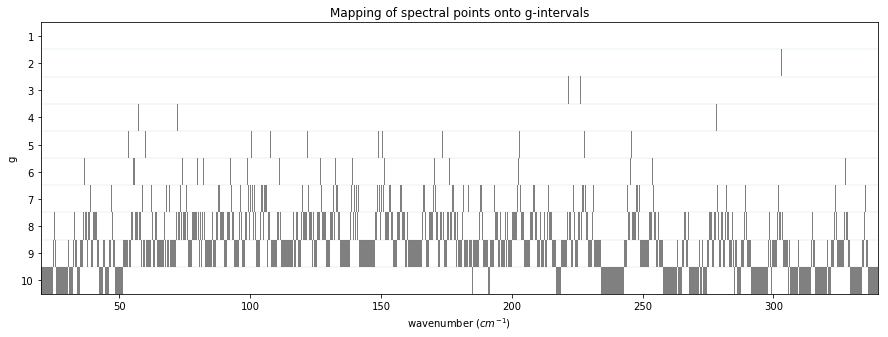

ipt =  222
            bg_atm    bv_atm
g v                         
1 92.53   0.000750  0.000750
  208.45  0.003245  0.002495
2 74.11   0.000512  0.000512
  100.51  0.001372  0.000860
  202.69  0.003784  0.002412


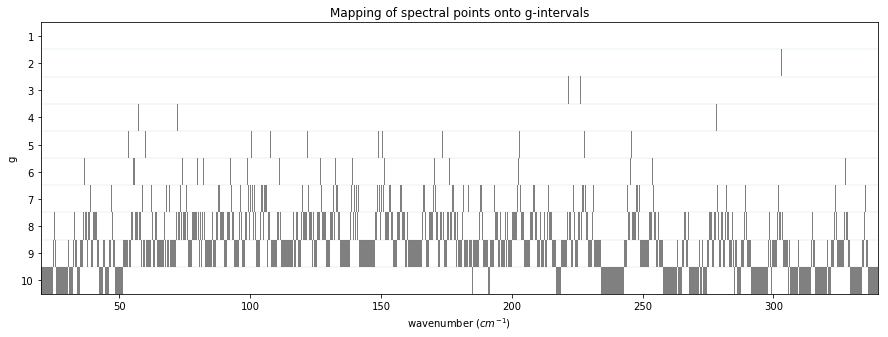

ipt =  193
            bg_atm    bv_atm
g v                         
1 92.53   0.000928  0.000928
  208.45  0.004246  0.003318
2 74.11   0.000628  0.000628
  100.51  0.001698  0.001070
  202.69  0.004892  0.003195


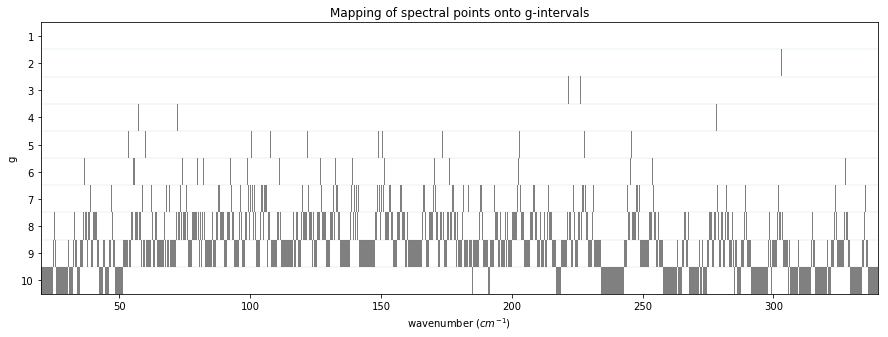

In [353]:
script()

In [354]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
